#Laboratorio 11
##A – Ehab, subset sum and Eight queens problems.
Lucas Peña Salas

Andres Bonilla Duarte

Jorge Andres Torres


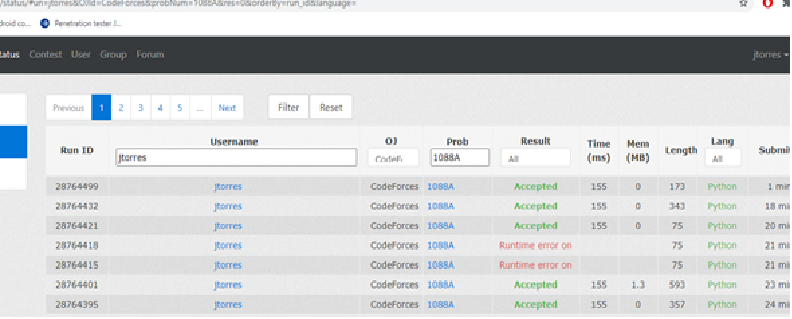

# **Fuerza bruta**

In [ ]:
import time
flag=False
x = int(input())
if 100<x or x<1:
  print("El numero seleccionado está fuera del rango especificado.")
  time.sleep(5)
for i in range(1,x+1):
  for j in range(i,x+1):
    if ((j/i)%1)==0 and (i*j)>x and (i/j)<x:
      print(str(j) + ' ' + str(i))
      flag=True
      break
  if flag:
    break
if not flag:
  print(-1)

10
6 2


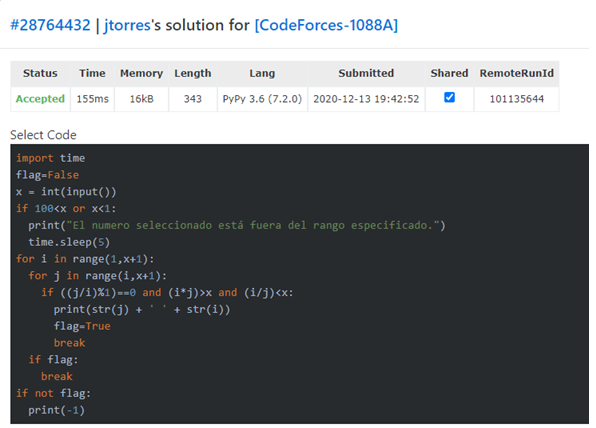

# **Better search**

In [ ]:
import time
import math
flag=False
cont=0
x = int(input())
if 100<x or x<1:
  print("El numero seleccionado está fuera del rango especificado.")
  time.sleep(5)
for i in range(1,x+1):
  for j in range(math.floor((x/2)+cont),x+1):
    if flag:
      if ((j/i)%1)==0 and (i*j)>x and (i/j)<x:
        print(str(j) + ' ' + str(i))
        flag=True
        break
    for j in range(math.floor((x/2)-cont),x+1):
      if ((j/i)%1)==0 and (i*j)>x and (i/j)<x:
        print(str(j) + ' ' + str(i))
        flag=True
        break
    if flag:
      break
  if flag:
    break
if not flag:
  print(-1)

10
6 2


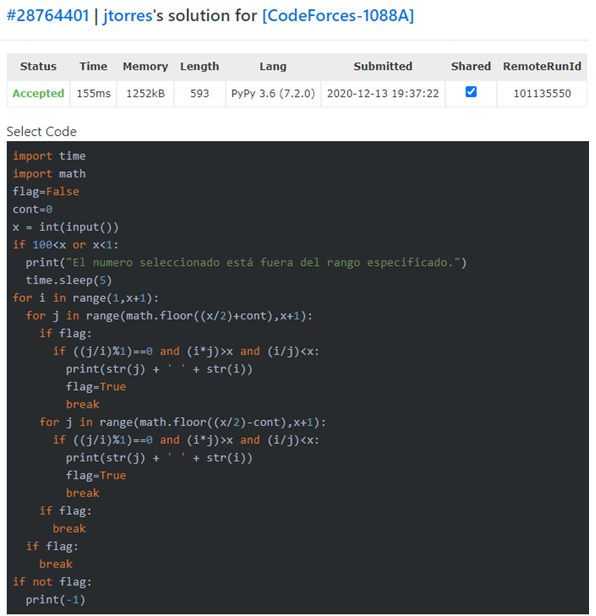

# **XX**

In [ ]:
y=int(input())
if 1< y or y<1:
  print(str(y)+" "+str(y))
else:
  print(-1)

10
10 10


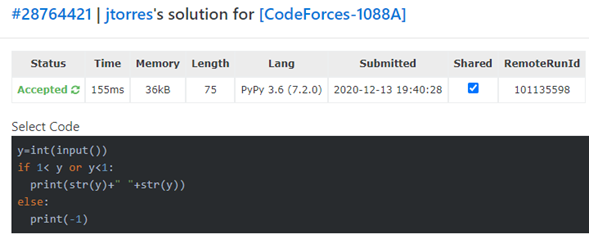

# **if ( floor(x/2)+1 % 2== 0)**

In [ ]:
import math
y = int(input())
if y == 1:
  print(-1)
elif (math.floor(y/2) + 1) % 2 == 0 :
  print(str(math.floor(y/2) + 1)+" 2")
else:
  print(str(math.floor(y/2) + 2)+" 2")

10
6 2


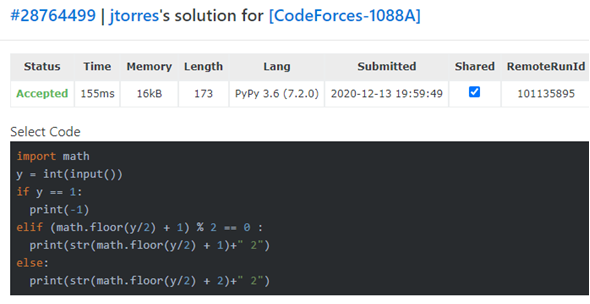

# Subset sum

In [ ]:
import itertools


def bruteforce(x_list, target):
    possiblities = []
    for x in powerset(x_list):
        possiblities.append((x, sum(x)))

    x_list, actual_value = closest(possiblities, target)

    return (actual_value, x_list)


def powerset(iterable):
    '''powerset([1,2,3]) --> () (1,) (2,) (3,) (1,2) (1,3) (2,3) (1,2,3)
    http://docs.python.org/library/itertools.html#recipes
    '''
    s = list(iterable)
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s) + 1))


def closest(possiblities, target):
    '''Modified from http://stackoverflow.com/questions/445782/finding-closest-match-in-collection-of-numbers/445824#445824'''
    return min((abs(target - total), (o_list, total))
               for o_list, total in possiblities)[1]


k= [10,20,30,50,100,1000]
for j in k:
  print(bruteforce([i for i in range (1,j)],j))

(10, (1, 2, 3, 4))
(20, (1, 2, 3, 4, 10))


Colab se queda sin memoria en n=30

# **Eight Queens problem**

In [ ]:
import numpy as np
def isAccepted(table,x,y):
  for i in range(len(table)):
    if table[y][i]==1: #Check columns
      return False
  for i in range(len(table)): #Check rows
    if table[i][x]==1:
      return False
  for i in range(len(table)): #Check diagonals
    for j in range(len(table)):
      if table[i][j]==1:
        if abs(i-y)==abs(j-x):
          return False
  return True
  

n=8
table = np.zeros([n,n],dtype = int)
print("TABLERO: \n"+str(table)) #Chess table is created, 0's represente empty spaces
table = table.tolist()

def solve(table):
  for yPos in range(len(table)):
    for xPos in range(len(table)):
      if table[yPos][xPos]==0: #Check if the position on the table is empty
        if isAccepted(table,xPos,yPos): #Check if the position is accepted for the queen
          table[yPos][xPos]=1
          solve(table)
          if sum(sum(row) for row in table)==len(table): 
            return table 
          table[yPos][xPos]=0 
  return table

solve(table)
print("SOLUTION:")
print(np.matrix(table))







TABLERO: 
[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]]
SOLUTION:
[[1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]]


# **N-QUEENS PROBLEM (backtracking)**

In [ ]:

def printSolution(board):#Print the solution board
  for i in range(N):
    for j in range(N):
      print(board[i][j], end = ' ')
    print()

def isSafe(board,row,col):#Checks if the space is safe from other queens
  for i in range(col): #Checks if the row is safe on the left side
    if board[row][i]==1:
      return False
  
  for i,j in zip(range(row,-1,-1), range(col,-1,-1)): #Checks left upper diagolnal
    if board[i][j] == 1:
      return False

  for i,j in zip(range(row,N,1), range(col,-1,-1)):#Checks left lower diagonal
    if board[i][j] == 1:
      return False

  return True

def SolveNQUtil(board,col):
  if col>=N:
    return True

  for i in range(N):
    if isSafe(board,i,col):#Check if the queen is safe in this positition
      board[i][col] = 1 #Set the queen on the position
      if solveNQUtil(board,col+1)==True:
        return True
      board[i][col]=0

    return False

def solveNQ():#Find the solution
  board = np.zeros([N,N], dtype=int)
  board = board.tolist()
  if solveNQUtil(board,0)== False:
    print("There's no solution")
    return False

  printSolution(board)
  return True

  
N = int(input("Ingrese el tamaño del tablero de ajedrez: "))
solveNQ()



Ingrese el tamaño del tablero de ajedrez: 9
1 0 0 0 0 0 0 0 0 
0 0 0 0 1 0 0 0 0 
0 1 0 0 0 0 0 0 0 
0 0 0 0 0 1 0 0 0 
0 0 0 0 0 0 0 0 1 
0 0 1 0 0 0 0 0 0 
0 0 0 0 0 0 0 1 0 
0 0 0 1 0 0 0 0 0 
0 0 0 0 0 0 1 0 0 


True